Non linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

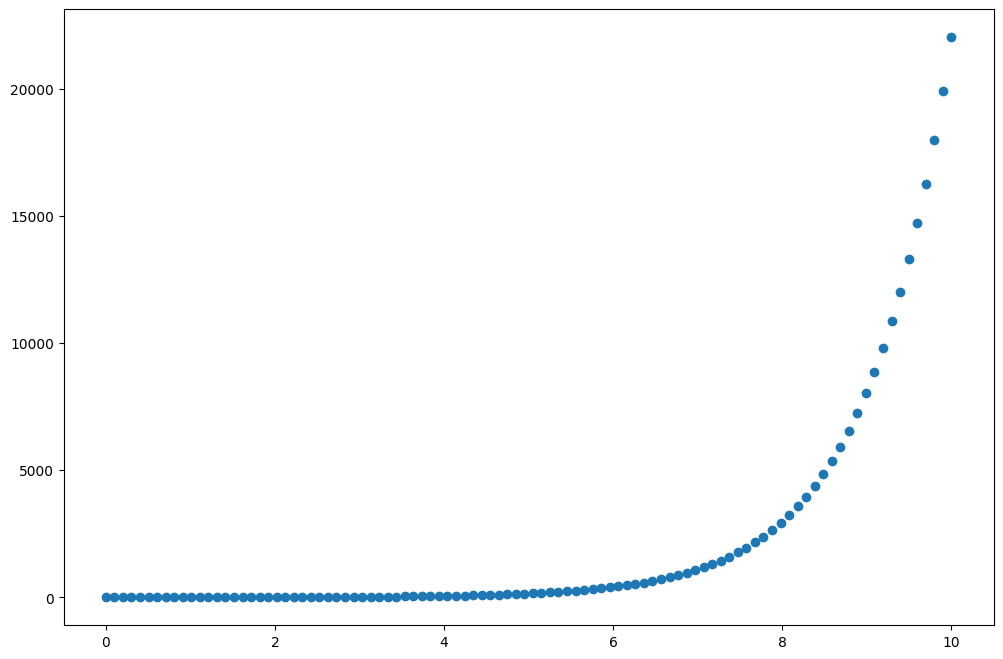

In [4]:
x = np.linspace(0,10,100)
y = np.exp(x)

plt.rcParams['figure.figsize'] = (12,8)
plt.scatter(x, y)

y^ = θ + θ1 * θ2^x

Exponantial
Quadratic
Cubic
...

Polynomial Regression
y^ = θ0 + θ1 * x + θ2 * x^2 + θ3 * x^3

x1 = x x2 = x^2 x3 = x^3

y^ = θ0 + θ1 * x1 + θ2 * x2 + θ3 * x3

Polynomial regression is considered to be a special case of traditional multiple linear regression. - Polynomial regression models can fit using the model of "least squares" - Minimize the sum of the squares of the differences between y and y^ (y_hat)

Non-linear regression
- non-linear relationship between the dependet variable and a set of independent variables
- For a model to be considered non-linear y^ must be a non-linear function of the paramaters θ, not necessarily the features of x.
- in Non-linear regression, a model is non-linear by parameters.
How can I know if a problem is linear or non-linear?

- Visually figure out relation, use plots of output variables with each input variable.
- Calculate the correlation coefficient between independet and dependent variables.
      -  if for all variables it is 0.7 or higher there is a linearity, and it's not appropriate to fit a non-linear regression.
How should I model my data, if it displays non-linear on a scatterplot?

- Polynomial regression
- Non-linear regression model
- Transform your data

Doğrusal regresyon,sayısal girdileri sayısal çıktılarla eşleştirmemize ve veri noktalarına bir çizgi uydurmamıza izien veren bir makine öğrenimi algoritmasıdır. Basit doğrusal regresyon analizinde yer alan iki değişken, x ve y olarak adlandırılır. Bağılmlı değişken y'nin, bağımsız değişken x ile nasıl ilişkili olduğunu açıklayan denklem regresyon modeli olarak biliniyor

## Örnek

In [4]:
#Kütüphaneler
import math
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [7]:
names = ['SUC_ORANİ', 'ARAZİ_ORANİ', 'ISLETME_ORAN', 'NEHIR_KENARI', 'NOX', 'ORT_ODA_SAYISI', 'YAS', 'DIS', 'RAD', 'VERGI', 'OGRNCI_OGRTMN_ORAN', 'B', 'LSTAT', 'ORT_DGR'] 
df = pd.read_csv('C:\DATA\data\week 7\housing.csv',
                      header=None, delim_whitespace=True, names=names) #, delimiter=r"\s+")

In [8]:
df.head()

,SUC_ORANİ,ARAZİ_ORANİ,ISLETME_ORAN,NEHIR_KENARI,NOX,ORT_ODA_SAYISI,YAS,DIS,RAD,VERGI,OGRNCI_OGRTMN_ORAN,B,LSTAT,ORT_DGR
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SUC_ORANİ           506 non-null    float64
 1   ARAZİ_ORANİ         506 non-null    float64
 2   ISLETME_ORAN        506 non-null    float64
 3   NEHIR_KENARI        506 non-null    int64  
 4   NOX                 506 non-null    float64
 5   ORT_ODA_SAYISI      506 non-null    float64
 6   YAS                 506 non-null    float64
 7   DIS                 506 non-null    float64
 8   RAD                 506 non-null    int64  
 9   VERGI               506 non-null    float64
 10  OGRNCI_OGRTMN_ORAN  506 non-null    float64
 11  B                   506 non-null    float64
 12  LSTAT               506 non-null    float64
 13  ORT_DGR             506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SUC_ORANİ,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ARAZİ_ORANİ,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
ISLETME_ORAN,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
NEHIR_KENARI,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
ORT_ODA_SAYISI,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
YAS,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
VERGI,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [12]:
def boyut(data):
    print("Satır Sayısı  : {}".format(data.shape[0]),"\n",
          "Sütün Sayısı  : {}".format(data.shape[1]))
boyut(df)
    

Satır Sayısı  : 506 
 Sütün Sayısı  : 14


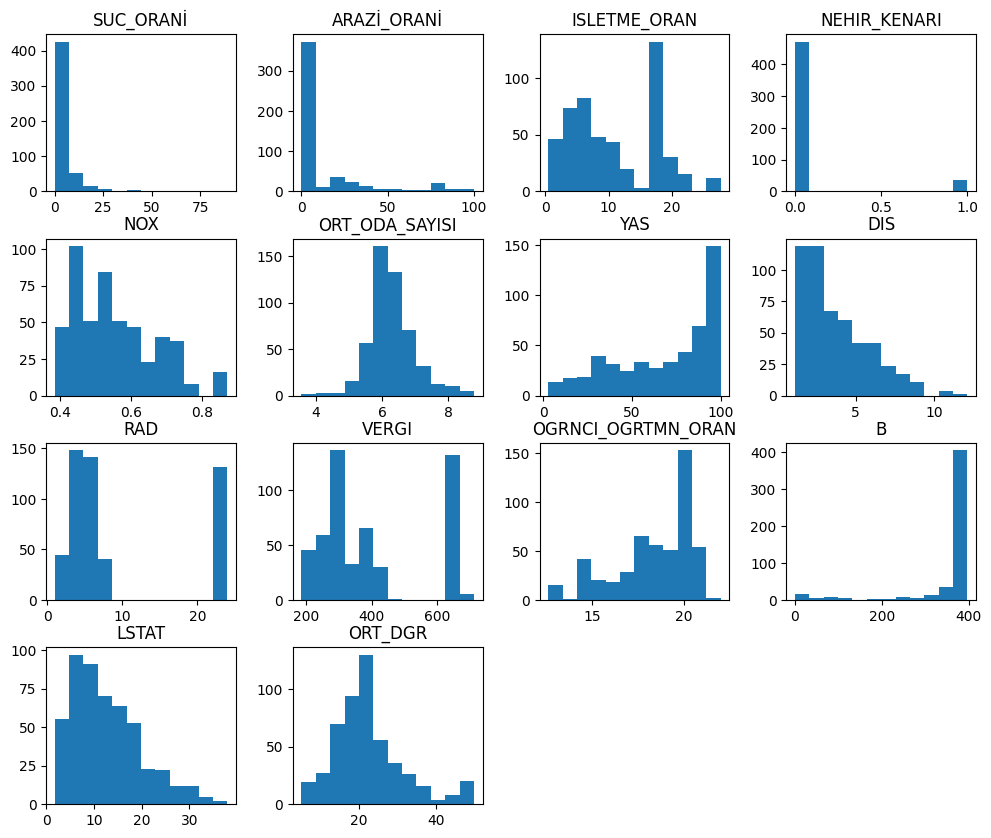

In [13]:
df.hist(bins=12, figsize=(12,10), grid=False);

Şimdi ORT_DGR y değişkeni olarak kabul edip, 
Her bir bağımsız değişkenin bağımlı değişken üzerindeki dağılımını görmek değişken seçimi yaparken avantajlı olacaktır.Bu yüzden saçılım grafiği çizdirebiliriz.

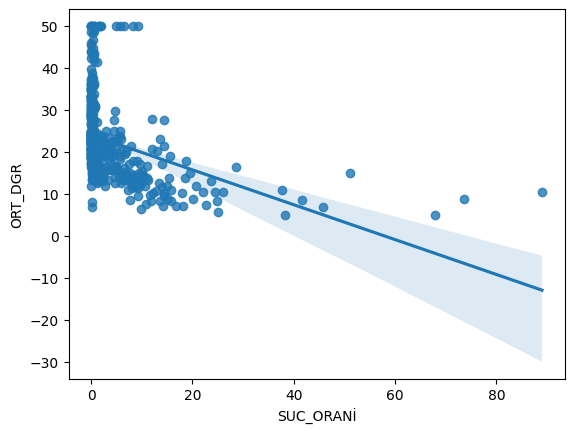

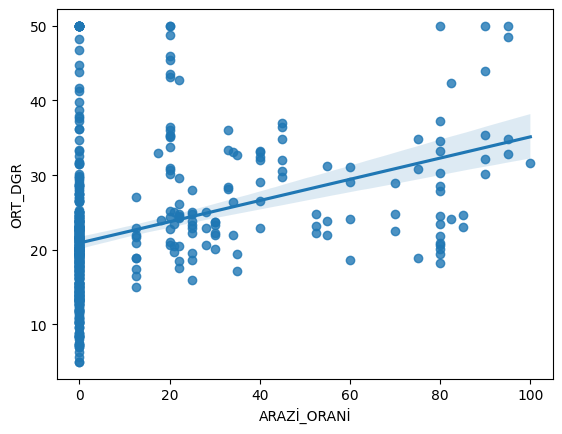

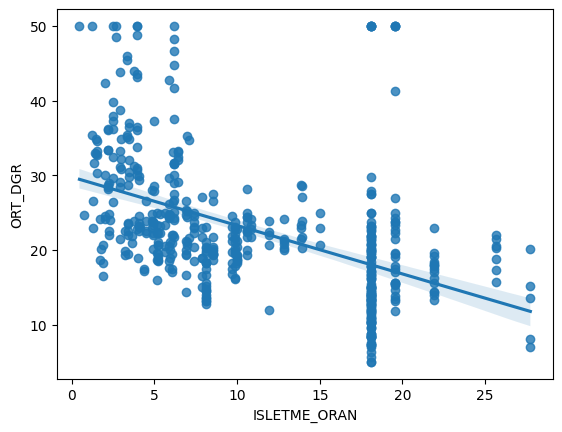

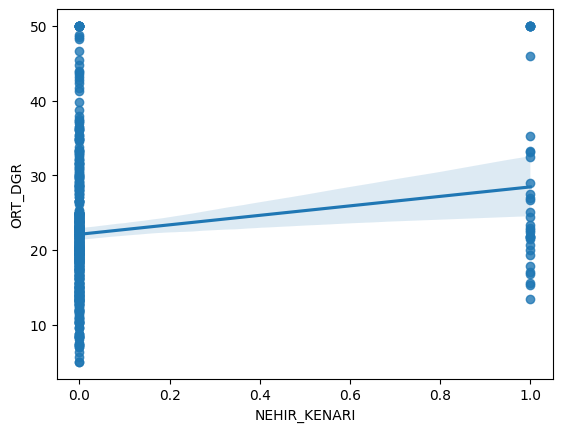

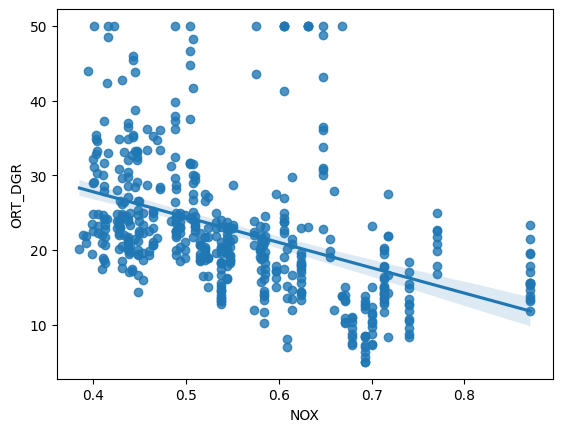

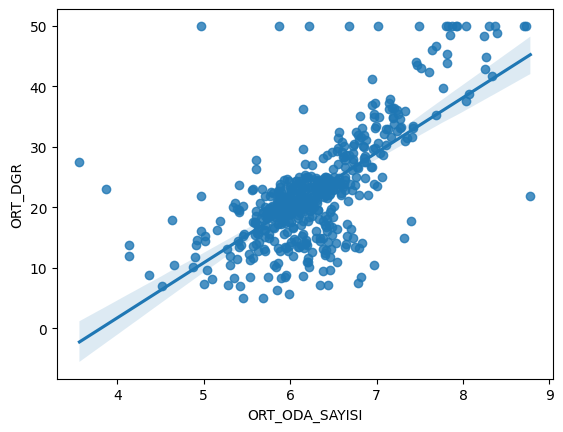

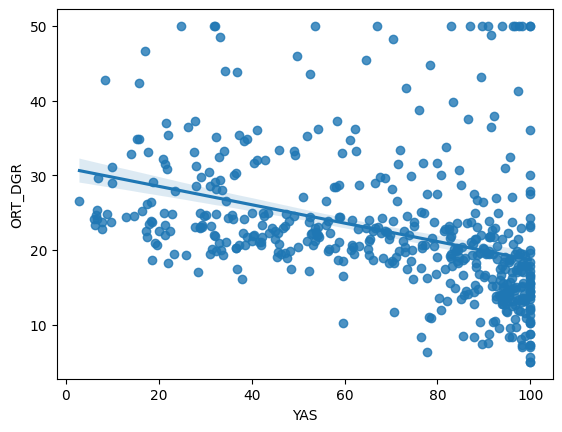

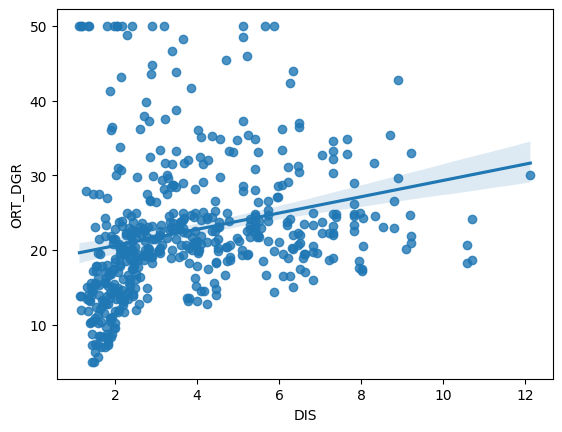

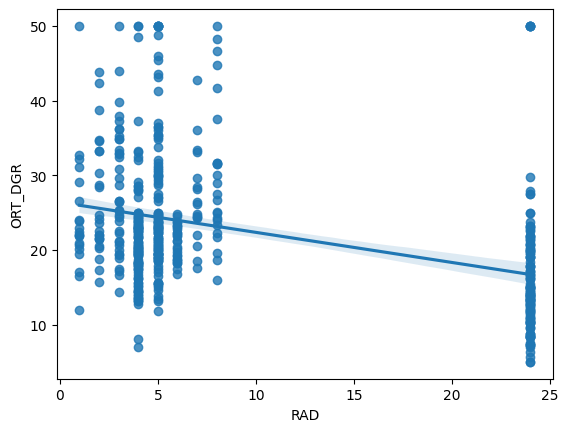

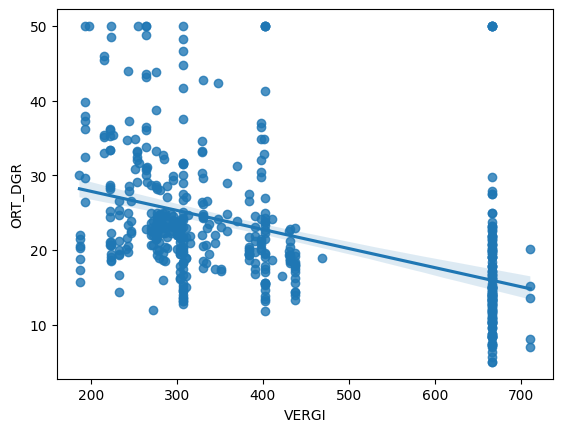

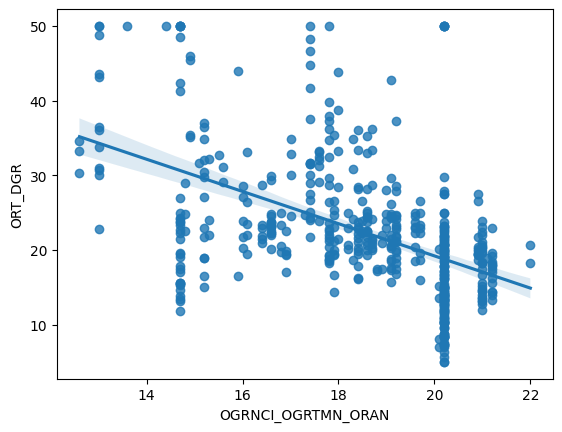

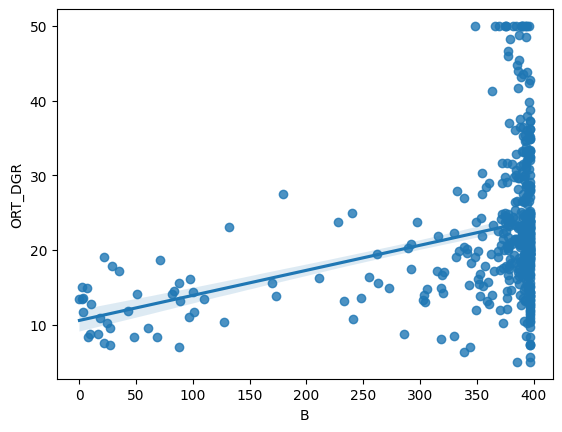

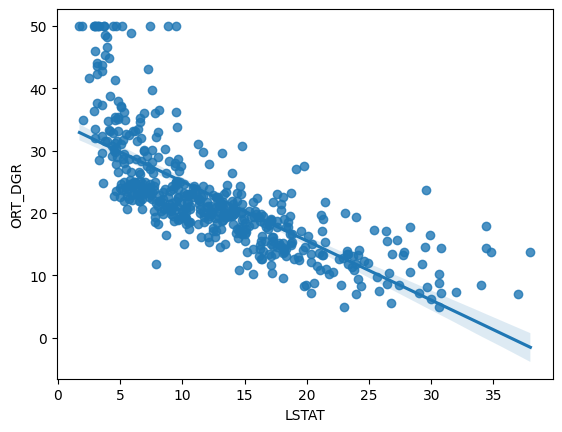

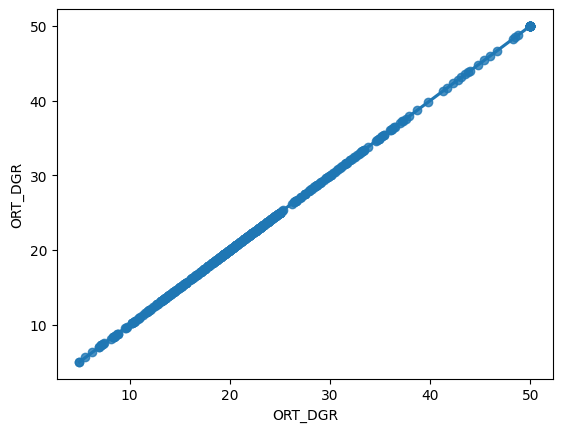

SUC_ORANİ             None
ARAZİ_ORANİ           None
ISLETME_ORAN          None
NEHIR_KENARI          None
NOX                   None
ORT_ODA_SAYISI        None
YAS                   None
DIS                   None
RAD                   None
VERGI                 None
OGRNCI_OGRTMN_ORAN    None
B                     None
LSTAT                 None
ORT_DGR               None
dtype: object

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def mult_graph(column):
    sns.regplot(x=column, y=df["ORT_DGR"])
    plt.show()

df.apply(mult_graph, axis=0)